### Computer Exercise 8 Part 1
### Name: Alexandyr Card
### G-Number: G01275535

In [128]:
### Load the Common Imports ###
from tensorflow import keras
import numpy as np
from keras import Input as Input
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dropout, BatchNormalization
from keras.models import Sequential
# from keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt

### Load the Dataset ###

In [74]:
# load the MNIST data set, which already splits into training and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Plot Sample Images

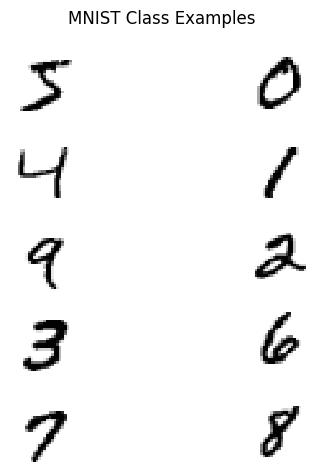

In [75]:
nums = set()

fig, ax = plt.subplots(nrows = 5, ncols=2)
row_num, col_num = 0, 0
for i in range(len(y_train)):
  if y_train[i] not in nums:
    nums.add(y_train[i])
    ax[row_num, col_num].imshow(x_train[i], cmap=matplotlib.cm.binary, interpolation="nearest")
    ax[row_num, col_num].axis("off")
    col_num += 1
    if col_num == 2:
      row_num +=1
      col_num = 0

  if row_num == 5:
    break

plt.suptitle("MNIST Class Examples")
plt.tight_layout()
plt.savefig("mnist_class_examples.jpg")
plt.show()


### Reshape and Scale the Data ###

In [76]:
# input image dimensions
img_x, img_y = 28, 28
#Reshape the data into a 4d tensor
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Convert class vectors to binary class matrices ###

This is the one to use with the `categorical_crossentropy` loss.

#### Question p. 2
When you type y_train[0] you get 5 prior to encoding

#### Questions p.3
1. [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
2. The variables have been encoded as vectors with the position of the element equal to the label. The reason the labels need to be encoded is because the loss function we use later, CategoricalCrossentropy, says in the documentation the labels must be one hot encoded. If we wanted to leave the labels as integers we could use the SparseCategoricalCrossentropy loss.

In [77]:
num_classes = 10 # Number of classes
print(y_train.shape)
print(y_train[0])
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)
print(y_train_categorical.shape)
print(y_train_categorical[0])

(60000,)
5
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### A Simple Example ###

### Question p.4
This is a 3 layer model with 784 neurons in the input layer that expects a (28,28) input, 32 fully connected neurons in the single hidden dense layer, and 32 neurons in the output layer. It is a fully connected network, the output size is 32. There are 25,120 parameters in the first hidden layers (785 * 32) and 1,056 paramters in the output layer (33 * 32). Because no activation is specified the activation function is linear. Therefore, this model is no better than a linear classifier.

In [6]:
# Define the model
model = Sequential()
# Add layers
model.add(Flatten(input_shape=(28, 28)))  # Define input shape in the first layer
model.add(Dense(32))  # Dense layer with 32 units
model.add(Dense(32))  # Another Dense layer with 32 units

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,176 (102.25 KB)

 Trainable params: 26,176 (102.25 KB)

 Non-trainable params: 0 (0.00 B)

### A More Complicated Model ###

### Questions p.4
1. This is a 7 layer NN. The input size is (28,28), 6 hidden layers with relu activation 2 sets of convolution and max pooling followed by a flattening and dense layer and an output layer with 10 classes using the softmax activation function. The layers have the following number of neurons: 784, 576, 124, 64, 16, 1024, 1000, 10.
2. There are 1,087,106 parameters that need to be learned.
3. Add same padding to the first convolution layer to keep the output of that layer equal to 28,28 then run the max pooling over it.

In [7]:
num_classes=10
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │       1,025,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,087,106 (4.15 MB)

 Trainable params: 1,087,106 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

### Question p.5
The mean squared error looks at the squared difference between the predicted label and the true label. The cross entropy loss looks at the sum of the true label * log(predicted label). For a softmax activation function you output a vector of probabilities. This means for the mean squared error you penalize each probability output even if the output is low whereas the multiplication within the cross entropy the only term the loss is concerned with is the true class label.

### Compile the Model ###

Here is a compilation of a simple model for recognition of images in the MNIST dataset.

In [71]:
# A Simple Model
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
#
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

### Define the Learning Parameters ###

Put in your own numbers.  These are simply placeholders and not necessarily the right numbers to use.  

In [72]:
batch_size = 128  # Set the batch size
epochs = 10 # Set the number of epochs

### Train the Model ###

In [73]:
hist = model.fit(x_train, y_train_categorical,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_categorical),
          callbacks=None) #[history])

#
# Print what is in hist.history
#
print('history contains: ', hist.history)

score = model.evaluate(x_test, y_test_categorical, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7213 - loss: 1.0545 - val_accuracy: 0.9003 - val_loss: 0.3848
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8971 - loss: 0.3785 - val_accuracy: 0.9122 - val_loss: 0.3201
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9119 - loss: 0.3226 - val_accuracy: 0.9160 - val_loss: 0.2980
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9164 - loss: 0.3042 - val_accuracy: 0.9205 - val_loss: 0.2873
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9189 - loss: 0.2874 - val_accuracy: 0.9222 - val_loss: 0.2810
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9201 - loss: 0.2845 - val_accuracy: 0.9239 - val_loss: 0.2737
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9237 - loss: 0.2798 - val_accuracy: 0.9238 - val_loss: 0.2722
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9251 - loss: 0.2668 - val_accuracy: 0.

### Plot Model Accuracy vs Epoch ###

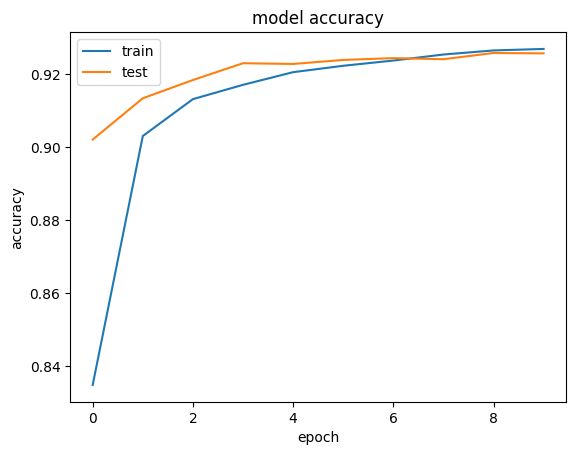

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Make Some Predictions ###

In [12]:
#predict first 4 images in the test set
print(y_test[:4])
model.predict(x_test[:4])

[7 2 1 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[1.13784745e-05, 2.36427905e-10, 2.19417052e-05, 4.60331468e-03,
        5.49038475e-07, 2.60132419e-05, 1.64510583e-09, 9.94894624e-01,
        1.97077716e-05, 4.22490382e-04],
       [6.09656679e-04, 4.09201857e-06, 9.89267230e-01, 7.37854978e-04,
        7.86277510e-13, 4.16942360e-03, 5.05212834e-03, 4.69641610e-15,
        1.59556803e-04, 1.79774268e-11],
       [5.47342370e-06, 9.73539114e-01, 1.30161531e-02, 3.89040704e-03,
        2.02990443e-04, 9.49259556e-04, 1.54015247e-03, 2.29430082e-03,
        4.09896160e-03, 4.63292206e-04],
       [9.99643803e-01, 3.58489835e-11, 7.97307730e-05, 4.73718501e-06,
        4.05475049e-08, 1.18781179e-04, 1.02964521e-04, 1.50487840e-05,
        1.67497528e-05, 1.82022413e-05]], dtype=float32)

### Assignment p.7
I created a logistic regression using a flattening layer and a dense layer with 10 output neurons and a softmax activation function. The model was compiled using the SGD solver with default parameters and the Categorical Cross Entropy loss function. The accuracy on the test set was approximately 89% and the model needed to learn 7,850 parameters.

Network            | Neurons           | Parameters         | Accuracy
-------------------|------------------ | ------------------ | ------------------
One-Layer          | 32                | 25,450             | 90.99%
One-Layer          | 64                | 50,890             | 91.27%
One-Layer          | 128               | 101,770            | 91.42%
One-Layer          | 256               | 203,530            | 91.48%
Two-Layer          | 32-32             | 26,506             | 91.53%
Two-Layer          | 64-64             | 55,050             | 91.88%
Two-Layer          | 128-128           | 118,282            | 91.96%
Two-Layer          | 256-256           | 269,322            | 91.94%
Two-Layer          | 300-100           | 266,610            | 91.95%

### Assignment p.7 Box 2
1. Done
2. See table above for comparison of performance, and images below.
3. Compared to the logistic regression the MLP do slightly better with classification; however, they require orders of magnitude increases in the number of parameters. Also, there seems to be a leveling off of accuracy at 92%
4. As discussed in lecture, it is not possible for the fully connected network to achieve 99% accuracy. Lecun was able to approach 99% with a 2 layer 500-150 network, but wasn't able to achieve it.
5. See response to question 4 that 99% accuracy is not possible with a fully connected network. We need to change the architecture to a CNN.

In [86]:
keras.utils.set_random_seed(42)
log_reg_model = Sequential()

log_reg_model.add(Input(shape=(28,28,1)))

log_reg_model.add(Flatten())

log_reg_model.add(keras.layers.Dense(
    10,
    activation = 'softmax',
    kernel_regularizer = 'l2'))

log_reg_model.compile(
    optimizer = keras.optimizers.SGD(),
    # loss = keras.losses.categorical_crossentropy,
    loss = keras.losses.CategoricalCrossentropy,
    metrics = ['accuracy']
)

log_reg_model.summary()

hist_log_reg_model = log_reg_model.fit(x_train, y_train_categorical,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2,
          callbacks=None) #[history])

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5125 - loss: 1.9297 - val_accuracy: 0.8318 - val_loss: 1.1121
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8241 - loss: 1.0791 - val_accuracy: 0.8608 - val_loss: 0.9061
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8493 - loss: 0.9193 - val_accuracy: 0.8723 - val_loss: 0.8274
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8613 - loss: 0.8507 - val_accuracy: 0.8792 - val_loss: 0.7847
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8690 - loss: 0.8108 - val_accuracy: 0.8825 - val_loss: 0.7571
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8728 - loss: 0.7840 - val_accuracy: 0.8857 - val_loss: 0.7374
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8774 - loss: 0.7643 - val_accuracy: 0.8882 - val_loss: 0.7224
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8798 - loss: 0.7491 - val_accuracy: 0.

Test accuracy: 0.8917999863624573


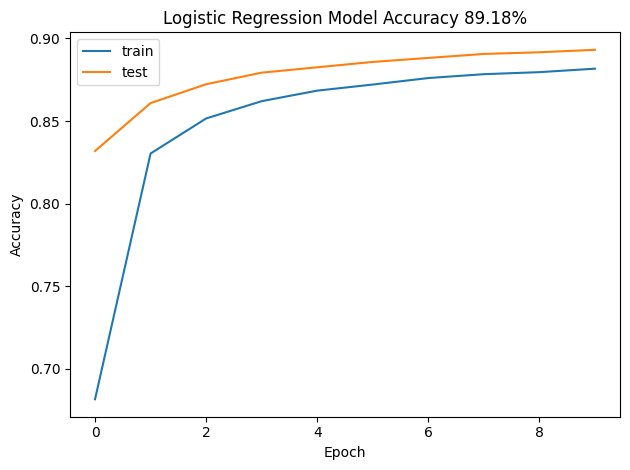

In [92]:
log_reg_model_score = log_reg_model.evaluate(x_test, y_test_categorical, verbose=0)
print('Test accuracy:', log_reg_model_score[1])

plt.plot(hist_log_reg_model.history['accuracy'])
plt.plot(hist_log_reg_model.history['val_accuracy'])
plt.title(f'Logistic Regression Model Accuracy {log_reg_model_score[1]*100:.2f}%')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig("log_regr.jpg")
plt.show()

In [98]:
keras.utils.set_random_seed(42)

def one_layer_mlp(neurons):
  one_layer_mlp = Sequential()

  one_layer_mlp.add(Input(shape=(28,28,1)))

  one_layer_mlp.add(Flatten())

  one_layer_mlp.add(keras.layers.Dense(
      neurons,
      activation = 'relu',
      kernel_regularizer = 'l2'))

  one_layer_mlp.add(keras.layers.Dense(
      10,
      activation = 'softmax',
      kernel_regularizer = 'l2'
      ))

  one_layer_mlp.compile(
      optimizer = keras.optimizers.Adam(),
      # loss = keras.losses.categorical_crossentropy,
      loss = keras.losses.CategoricalCrossentropy,
      metrics = ['accuracy']
  )
  one_layer_mlp.summary()

  # hist_log_reg_model = log_reg_model.fit(x_train, y_train_categorical,
  one_layer_mlp_hist = one_layer_mlp.fit(x_train, y_train_categorical,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_split = 0.2,
            callbacks=None) #[history])

  one_layer_mlp_score = one_layer_mlp.evaluate(x_test, y_test_categorical, verbose=0)

  plt.plot(one_layer_mlp_hist.history['accuracy'])
  plt.plot(one_layer_mlp_hist.history['val_accuracy'])
  plt.title(f'One Layer, {neurons} Neurons, Model Accuracy: {one_layer_mlp_score[1]*100:.2f}%')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.tight_layout()
  plt.savefig(f"one_layer_mlp_{neurons}.jpg")
  plt.show()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_23 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7115 - loss: 1.5069 - val_accuracy: 0.9047 - val_loss: 0.7462
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8991 - loss: 0.7565 - val_accuracy: 0.9103 - val_loss: 0.7131
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9024 - loss: 0.7332 - val_accuracy: 0.9114 - val_loss: 0.7044
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9044 - loss: 0.7256 - val_accuracy: 0.9129 - val_loss: 0.6998
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9048 - loss: 0.7211 - val_accuracy: 0.9135 - val_loss: 0.6967
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9053 - loss: 0.7179 - val_accuracy: 0.9140 - val_loss: 0.6945
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9061 - loss: 0.7155 - val_accuracy: 0.9148 - val_loss: 0.6928
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9062 - loss: 0.7135 - val_accuracy: 0.

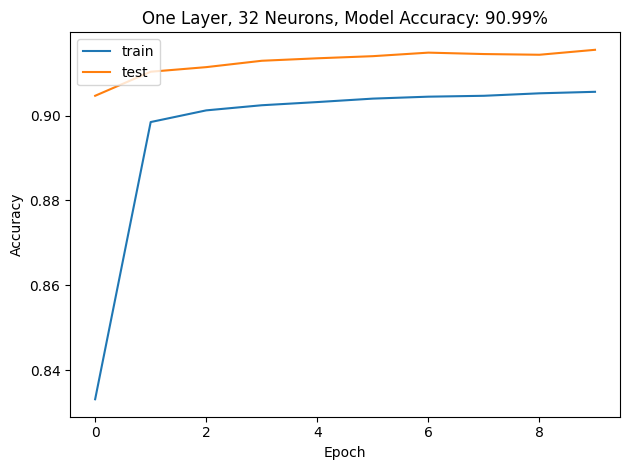

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_24 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7715 - loss: 1.5882 - val_accuracy: 0.9087 - val_loss: 0.7406
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9026 - loss: 0.7525 - val_accuracy: 0.9130 - val_loss: 0.7108
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9050 - loss: 0.7304 - val_accuracy: 0.9147 - val_loss: 0.7026
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9069 - loss: 0.7226 - val_accuracy: 0.9159 - val_loss: 0.6977
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9073 - loss: 0.7179 - val_accuracy: 0.9167 - val_loss: 0.6943
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9079 - loss: 0.7147 - val_accuracy: 0.9168 - val_loss: 0.6918
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9077 - loss: 0.7124 - val_accuracy: 0.9166 - val_loss: 0.6901
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9080 - loss: 0.7107 - val_accuracy: 0.

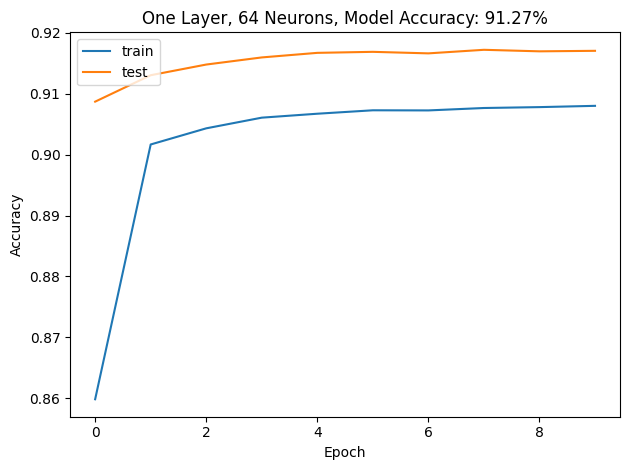

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_25 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7990 - loss: 1.7869 - val_accuracy: 0.9090 - val_loss: 0.7294
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9021 - loss: 0.7450 - val_accuracy: 0.9126 - val_loss: 0.7084
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9045 - loss: 0.7288 - val_accuracy: 0.9145 - val_loss: 0.7017
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9061 - loss: 0.7223 - val_accuracy: 0.9156 - val_loss: 0.6972
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9067 - loss: 0.7183 - val_accuracy: 0.9157 - val_loss: 0.6941
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9072 - loss: 0.7157 - val_accuracy: 0.9164 - val_loss: 0.6919
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9075 - loss: 0.7138 - val_accuracy: 0.9167 - val_loss: 0.6905
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9075 - loss: 0.7124 - val_accuracy: 

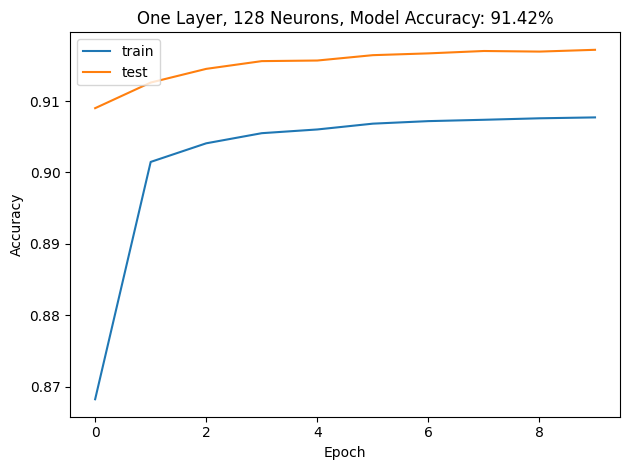

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_26 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8163 - loss: 2.1218 - val_accuracy: 0.9112 - val_loss: 0.7220
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9028 - loss: 0.7415 - val_accuracy: 0.9138 - val_loss: 0.7062
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9051 - loss: 0.7295 - val_accuracy: 0.9149 - val_loss: 0.7004
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9063 - loss: 0.7243 - val_accuracy: 0.9158 - val_loss: 0.6971
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9063 - loss: 0.7211 - val_accuracy: 0.9163 - val_loss: 0.6950
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9069 - loss: 0.7188 - val_accuracy: 0.9162 - val_loss: 0.6936
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9068 - loss: 0.7172 - val_accuracy: 0.9162 - val_loss: 0.6926
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9072 - loss: 0.7159 - val_accurac

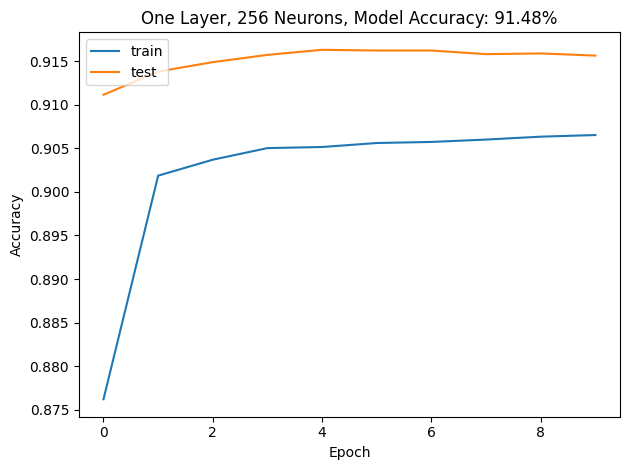

In [99]:
keras.utils.set_random_seed(42)
one_layer_mlp(32)
one_layer_mlp(64)
one_layer_mlp(128)
one_layer_mlp(256)

In [100]:
def two_layer_mlp(neurons):
  two_layer_mlp = Sequential()

  two_layer_mlp.add(Input(shape=(28,28,1)))

  two_layer_mlp.add(Flatten())

  two_layer_mlp.add(keras.layers.Dense(
      neurons,
      activation = 'relu',
      kernel_regularizer = 'l2'))

  two_layer_mlp.add(keras.layers.Dense(
      neurons,
      activation = 'relu',
      kernel_regularizer = 'l2'))

  two_layer_mlp.add(keras.layers.Dense(
      10,
      activation = 'softmax',
      kernel_regularizer = 'l2'
      ))

  two_layer_mlp.compile(
      optimizer = keras.optimizers.Adam(),
      # loss = keras.losses.categorical_crossentropy,
      loss = keras.losses.CategoricalCrossentropy,
      metrics = ['accuracy']
  )
  two_layer_mlp.summary()

  # hist_log_reg_model = log_reg_model.fit(x_train, y_train_categorical,
  two_layer_mlp_hist = two_layer_mlp.fit(x_train, y_train_categorical,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_split = 0.2,
            callbacks=None) #[history])

  two_layer_mlp_score = two_layer_mlp.evaluate(x_test, y_test_categorical, verbose=0)

  plt.plot(two_layer_mlp_hist.history['accuracy'])
  plt.plot(two_layer_mlp_hist.history['val_accuracy'])
  plt.title(f'Two Layer, {neurons} Neurons, Model Accuracy: {two_layer_mlp_score[1]*100:.2f}%')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.tight_layout()
  plt.savefig(f"two_layer_mlp_{neurons}.jpg")
  plt.show()

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_27 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6886 - loss: 1.7852 - val_accuracy: 0.9038 - val_loss: 0.8704
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9002 - loss: 0.8652 - val_accuracy: 0.9087 - val_loss: 0.8071
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9060 - loss: 0.8171 - val_accuracy: 0.9112 - val_loss: 0.7854
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9074 - loss: 0.7982 - val_accuracy: 0.9139 - val_loss: 0.7733
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9094 - loss: 0.7874 - val_accuracy: 0.9168 - val_loss: 0.7648
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9114 - loss: 0.7800 - val_accuracy: 0.9183 - val_loss: 0.7597
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9128 - loss: 0.7751 - val_accuracy: 0.9196 - val_loss: 0.7554
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9138 - loss: 0.7713 - val_accuracy: 0.

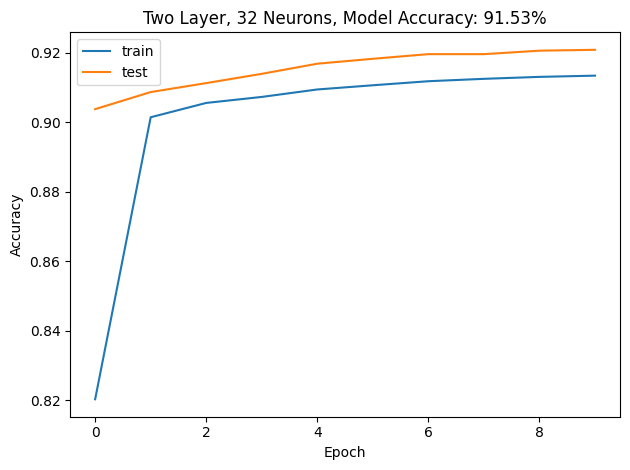

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_28 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7723 - loss: 1.9682 - val_accuracy: 0.9093 - val_loss: 0.8683
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9045 - loss: 0.8601 - val_accuracy: 0.9137 - val_loss: 0.7936
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9065 - loss: 0.8061 - val_accuracy: 0.9151 - val_loss: 0.7742
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9085 - loss: 0.7901 - val_accuracy: 0.9168 - val_loss: 0.7646
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9096 - loss: 0.7816 - val_accuracy: 0.9187 - val_loss: 0.7581
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9108 - loss: 0.7756 - val_accuracy: 0.9200 - val_loss: 0.7535
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9118 - loss: 0.7711 - val_accuracy: 0.9196 - val_loss: 0.7497
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9131 - loss: 0.7674 - val_accuracy: 0.

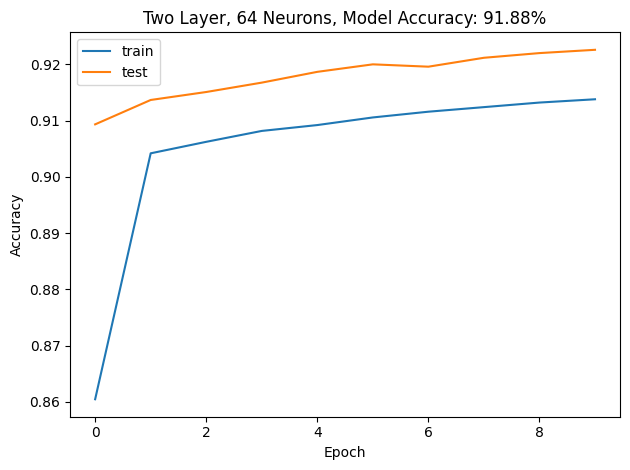

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_29 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8122 - loss: 2.3642 - val_accuracy: 0.9138 - val_loss: 0.8381
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9061 - loss: 0.8381 - val_accuracy: 0.9164 - val_loss: 0.7755
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9106 - loss: 0.7950 - val_accuracy: 0.9190 - val_loss: 0.7620
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9121 - loss: 0.7831 - val_accuracy: 0.9196 - val_loss: 0.7541
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9127 - loss: 0.7761 - val_accuracy: 0.9206 - val_loss: 0.7490
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9132 - loss: 0.7714 - val_accuracy: 0.9212 - val_loss: 0.7455
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9139 - loss: 0.7679 - val_accuracy: 0.9214 - val_loss: 0.7428
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9143 - loss: 0.7653 - val_accuracy: 0

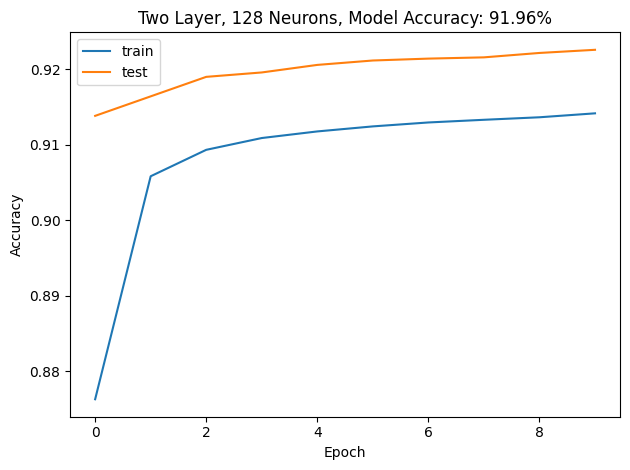

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_30 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8200 - loss: 3.0287 - val_accuracy: 0.9146 - val_loss: 0.8106
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9070 - loss: 0.8225 - val_accuracy: 0.9204 - val_loss: 0.7707
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9104 - loss: 0.7954 - val_accuracy: 0.9215 - val_loss: 0.7598
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9117 - loss: 0.7851 - val_accuracy: 0.9209 - val_loss: 0.7536
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9123 - loss: 0.7788 - val_accuracy: 0.9208 - val_loss: 0.7499
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9128 - loss: 0.7743 - val_accuracy: 0.9211 - val_loss: 0.7475
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9132 - loss: 0.7710 - val_accuracy: 0.9214 - val_loss: 0.7449
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9134 - loss: 0.7681 - val_accu

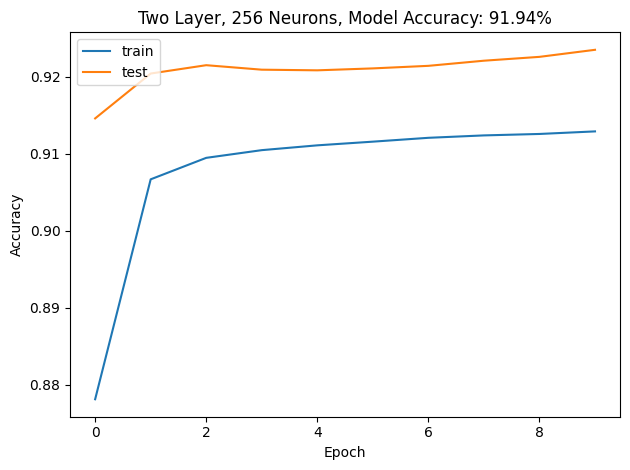

In [101]:
keras.utils.set_random_seed(42)
two_layer_mlp(32)
two_layer_mlp(64)
two_layer_mlp(128)
two_layer_mlp(256)

In [ ]:
class_mlp = Sequential()

class_mlp.add(Input(shape=(28,28,1)))

class_mlp.add(Flatten())

class_mlp.add(keras.layers.Dense(
    300,
    activation = 'relu',
    kernel_regularizer = 'l2'))

class_mlp.add(keras.layers.Dense(
    100,
    activation = 'relu',
    kernel_regularizer = 'l2'))

class_mlp.add(keras.layers.Dense(
    10,
    activation = 'softmax',
    kernel_regularizer = 'l2'
    ))

class_mlp.compile(
    optimizer = keras.optimizers.Adam(),
    # loss = keras.losses.categorical_crossentropy,
    loss = keras.losses.CategoricalCrossentropy,
    metrics = ['accuracy']
)

class_mlp.summary()

# hist_log_reg_model = log_reg_model.fit(x_train, y_train_categorical,
class_mlp_hist = class_mlp.fit(x_train, y_train_categorical,
          # CRANK UP BATCH SIZE AND EPOCHS
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_split = 0.2,
          callbacks=None) #[history])

class_mlp_score = class_mlp.evaluate(x_test, y_test_categorical, verbose=0)

plt.plot(class_mlp_hist.history['accuracy'])
plt.plot(class_mlp_hist.history['val_accuracy'])
plt.title(f'Two Layer, 300-100, Model Accuracy: {class_mlp_score[1]*100:.2f}%')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig(f"class_mlp.jpg")

plt.show()

plt.plot(class_mlp_hist.history['loss'])
plt.plot(class_mlp_hist.history['val_loss'])
plt.title(f'Two Layer, 300-100, Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig(f"class_mlp_loss.jpg")

plt.show()

### Assignments pp. 7-8
1. The accuracy of the classifier is 15%. There was a steep drop in the last training epoch for the validation data from 50% to 15%. Regardless this is a terrible model. The model needs to learn 8,840 parameters. The error in this model was the lack of a flattening layer.
2. The error in this network design was the final layer has to have the same number of neurons as classes.
3. This network performs even worse. The accuracy is 9.8%, but it needs to learn 33,898 parameters.

In [110]:
keras.utils.set_random_seed(42)

model = Sequential()
model.add(keras.Input(shape=(28,28,)))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))

model.compile(
    optimizer = keras.optimizers.Adam(),
    # loss = keras.losses.categorical_crossentropy,
    loss = keras.losses.CategoricalCrossentropy,
    metrics = ['accuracy']
)

model.summary()

# hist_log_reg_model = log_reg_model.fit(x_train, y_train_categorical,
model_hist = model.fit(x_train, y_train_categorical,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2,
          callbacks=None) #[history])

Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_35 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,840 (34.53 KB)

 Trainable params: 8,840 (34.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1776 - loss: 6.2550 - val_accuracy: 0.3951 - val_loss: 5.8605
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3658 - loss: 5.9403 - val_accuracy: 0.4125 - val_loss: 5.6163
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4027 - loss: 5.7067 - val_accuracy: 0.4478 - val_loss: 5.5747
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3535 - loss: 5.8216 - val_accuracy: 0.3890 - val_loss: 5.7841
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4082 - loss: 5.7111 - val_accuracy: 0.3647 - val_loss: 5.7114
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3637 - loss: 5.7724 - val_accuracy: 0.4403 - val_loss: 5.5350
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4131 - loss: 5.6407 - val_accuracy: 0.4223 - val_loss: 5.4965
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4184 - loss: 5.6152 - val_accuracy: 0.

In [111]:
model_score = model.evaluate(x_test, y_test_categorical, verbose=0)
print(model_score)

[10.198128700256348, 0.14710000157356262]


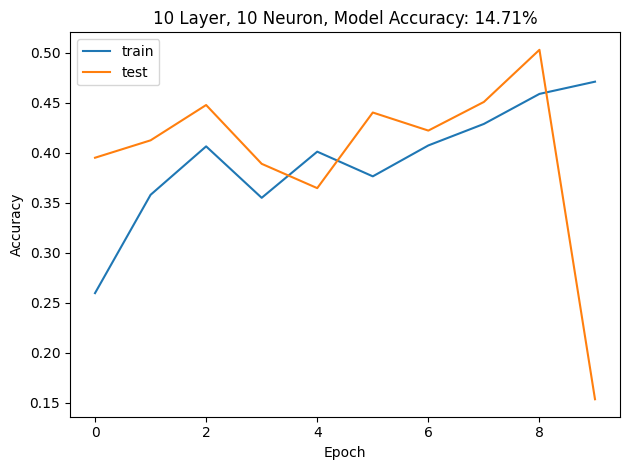

In [114]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title(f'10 Layer, 10 Neuron, Model Accuracy: {model_score[1]*100:.2f}%')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig(f"ten_ten_network.jpg")

Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_38 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,898 (132.41 KB)

 Trainable params: 33,898 (132.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3019 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0968 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0968 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0968 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0968 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0968 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0968 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0968 - loss: nan - val_accuracy: 0.0995 - val_loss: nan
Epoch 9/10
375/375 ━━━━━

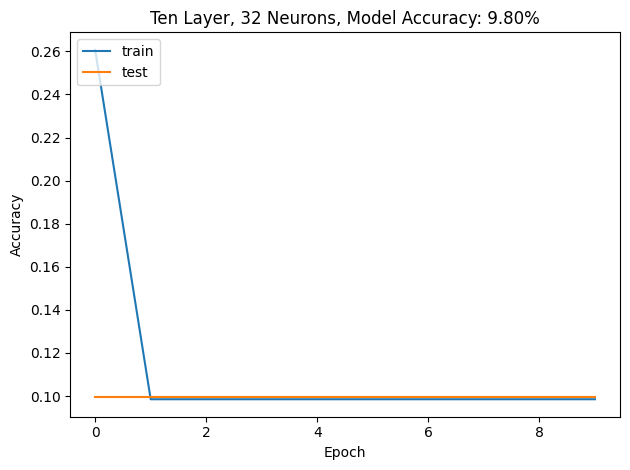

In [117]:
keras.utils.set_random_seed(42)

model = Sequential()
model.add(keras.Input(shape=(28,28,)))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='relu'))

model.compile(
    optimizer = keras.optimizers.Adam(),
    # loss = keras.losses.categorical_crossentropy,
    loss = keras.losses.CategoricalCrossentropy,
    metrics = ['accuracy']
)

model.summary()

# hist_log_reg_model = log_reg_model.fit(x_train, y_train_categorical,
model_hist = model.fit(x_train, y_train_categorical,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2,
          callbacks=None) #[history])

model_score = model.evaluate(x_test, y_test_categorical, verbose=0)

plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title(f'Ten Layer, 32 Neurons, Model Accuracy: {model_score[1]*100:.2f}%')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig(f"thirty2_ten_network.jpg")

### Assignment p.8
1. Batch size is the number training samples to send through the model before calculating the loss and backpropogating for a weight update. Once I determined the best model I changed the batch size from 128 to 32. Decreasing the batch size increased the training time. I believe this is the case because we end up performing more backpropogations because we pass more batches through the network per epoch.
2. A dense layer is a fully connected layer. It is necessary to have at least one dense layer after the flattening layer for the classification.
3. Batch normalization is used to stabilize networks during training and to create deeper networks. It allows deeper models that train faster. It applies a transformation to keep the values close to mean 0 and standard deviation of 1. According to Keras, the layer works differently during training and evaluation. During training, the batch norm layer uses the mean and standard deviation of the batch for the specific channel. During evaluation, it uses the moving average of the mean and standard deviation of the batches it saw during training.
4. Dropout is a regularization technique which only applies during training. During training it randomly sets a specific amount of inputs to 0 to force the network to learn different pathways, thus preventing overfitting.
5. The number of parameters learned in the CNNs is approximately 100,000. This is less than any of the fully connected neural nets with 128 neurons or more, regardless of depth. Additionally, the CNN architecture does a much better job classifying the images than the fully connected networks while requiring fewer parameters to be learned.

Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 7, 7, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_42 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 120)                 │          94,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_150 (Dense)                    │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,786 (421.04 KB)

 Trainable params: 107,786 (421.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 96ms/step - accuracy: 0.1159 - loss: 2.3406 - val_accuracy: 0.1060 - val_loss: 2.3026
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.1159 - loss: 2.3012 - val_accuracy: 0.1060 - val_loss: 2.3025
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.1159 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3025
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 96ms/step - accuracy: 0.1159 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3025
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 104ms/step - accuracy: 0.1159 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3025
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.1159 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3024
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 97ms/step - accuracy: 0.1159 - loss: 2.3010 - val_accuracy: 0.1060 - val_loss: 2.3024
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.1160 - loss: 2.301

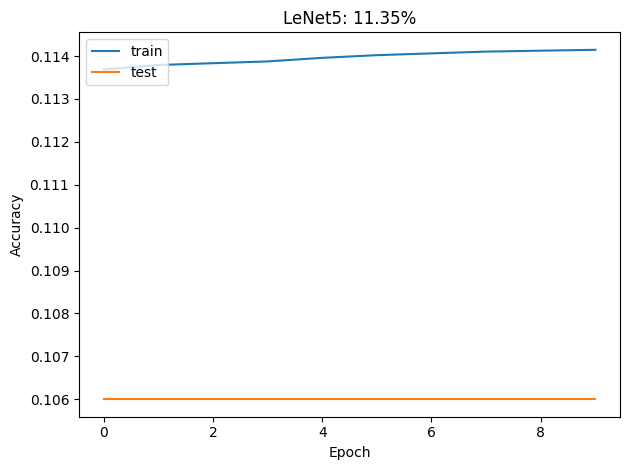

In [126]:
### LENET 5

keras.utils.set_random_seed(42)

model = keras.Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=6,kernel_size=(5,5),padding='same',activation='sigmoid'))
model.add(AveragePooling2D(2))
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='sigmoid'))
model.add(AveragePooling2D(2))
model.add(Flatten())
model.add(Dense(units=120, activation='sigmoid'))
model.add(Dense(units=84, activation= 'sigmoid'))
model.add(Dense(units=10, activation ='softmax'))

model.compile(
    optimizer = keras.optimizers.SGD(),
    # loss = keras.losses.categorical_crossentropy,
    loss = keras.losses.CategoricalCrossentropy,
    metrics = ['accuracy']
)

model.summary()

# hist_log_reg_model = log_reg_model.fit(x_train, y_train_categorical,
model_hist = model.fit(x_train, y_train_categorical,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2,
          callbacks=None) #[history])

model_score = model.evaluate(x_test, y_test_categorical, verbose=0)

plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title(f'LeNet5: {model_score[1]*100:.2f}%')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig(f"lenet_5.jpg")

Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_43 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 120)                 │          94,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,786 (421.04 KB)

 Trainable params: 107,786 (421.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 112ms/step - accuracy: 0.7658 - loss: 0.7520 - val_accuracy: 0.9693 - val_loss: 0.1083
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.9700 - loss: 0.0981 - val_accuracy: 0.9767 - val_loss: 0.0749
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.9797 - loss: 0.0652 - val_accuracy: 0.9818 - val_loss: 0.0606
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.9828 - loss: 0.0533 - val_accuracy: 0.9845 - val_loss: 0.0550
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - accuracy: 0.9857 - loss: 0.0445 - val_accuracy: 0.9851 - val_loss: 0.0550
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.9884 - loss: 0.0372 - val_accuracy: 0.9847 - val_loss: 0.0562
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.9906 - loss: 0.0312 - val_accuracy: 0.9862 - val_loss: 0.0523
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.9920 - loss: 0

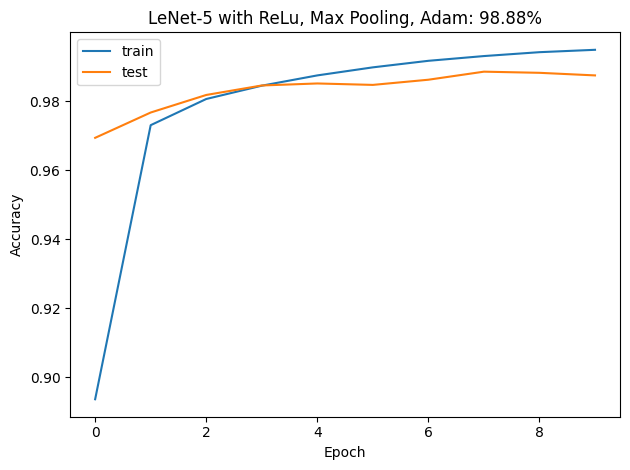

In [127]:
### LENET 5, RELU Activation, Adam solver, Max Pooling

keras.utils.set_random_seed(42)

model = keras.Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=6,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation= 'relu'))
model.add(Dense(units=10, activation ='softmax'))

model.compile(
    optimizer = keras.optimizers.Adam(),
    # loss = keras.losses.categorical_crossentropy,
    loss = keras.losses.CategoricalCrossentropy,
    metrics = ['accuracy']
)

model.summary()

# hist_log_reg_model = log_reg_model.fit(x_train, y_train_categorical,
model_hist = model.fit(x_train, y_train_categorical,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2,
          callbacks=None) #[history])

model_score = model.evaluate(x_test, y_test_categorical, verbose=0)

plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title(f'LeNet-5 with ReLu, Max Pooling, Adam: {model_score[1]*100:.2f}%')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig(f"lenet_5_relu_mp_adam.jpg")

Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 6)           │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_44 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 120)                 │          94,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,874 (421.38 KB)

 Trainable params: 107,830 (421.21 KB)

 Non-trainable params: 44 (176.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.8750 - loss: 0.4050 - val_accuracy: 0.9646 - val_loss: 0.1252
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.9810 - loss: 0.0602 - val_accuracy: 0.9841 - val_loss: 0.0518
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.9880 - loss: 0.0367 - val_accuracy: 0.9848 - val_loss: 0.0502
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9926 - loss: 0.0210 - val_accuracy: 0.9842 - val_loss: 0.0577
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.9956 - loss: 0.0143 - val_accuracy: 0.9860 - val_loss: 0.0516
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.9958 - loss: 0.0127 - val_accuracy: 0.9868 - val_loss: 0.0514
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 109ms/step - accuracy: 0.9954 - loss: 0.0142 - val_accuracy: 0.9857 - val_loss: 0.0547
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.9965 - loss: 0

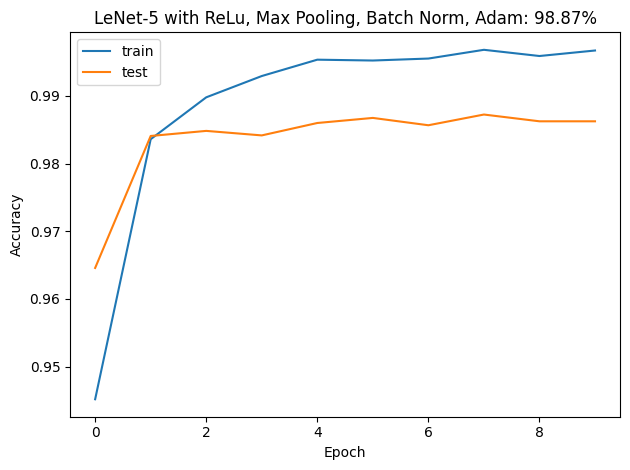

In [129]:
### LENET 5, RELU Activation, Adam solver, Max Pooling, Batch Norm

keras.utils.set_random_seed(42)

model = keras.Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=6,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation= 'relu'))
model.add(Dense(units=10, activation ='softmax'))

model.compile(
    optimizer = keras.optimizers.Adam(),
    # loss = keras.losses.categorical_crossentropy,
    loss = keras.losses.CategoricalCrossentropy,
    metrics = ['accuracy']
)

model.summary()

# hist_log_reg_model = log_reg_model.fit(x_train, y_train_categorical,
model_hist = model.fit(x_train, y_train_categorical,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2,
          callbacks=None) #[history])

model_score = model.evaluate(x_test, y_test_categorical, verbose=0)

plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title(f'LeNet-5 with ReLu, Max Pooling, Batch Norm, Adam: {model_score[1]*100:.2f}%')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig(f"lenet_5_relu_mp_bn_adam.jpg")

Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 14, 14, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_45 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 120)                 │          94,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,786 (421.04 KB)

 Trainable params: 107,786 (421.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 111ms/step - accuracy: 0.7308 - loss: 0.8438 - val_accuracy: 0.9712 - val_loss: 0.0979
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - accuracy: 0.9566 - loss: 0.1359 - val_accuracy: 0.9786 - val_loss: 0.0700
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 107ms/step - accuracy: 0.9672 - loss: 0.1027 - val_accuracy: 0.9828 - val_loss: 0.0557
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.9732 - loss: 0.0864 - val_accuracy: 0.9842 - val_loss: 0.0498
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.9763 - loss: 0.0763 - val_accuracy: 0.9864 - val_loss: 0.0456
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 110ms/step - accuracy: 0.9777 - loss: 0.0698 - val_accuracy: 0.9879 - val_loss: 0.0449
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 107ms/step - accuracy: 0.9809 - loss: 0.0597 - val_accuracy: 0.9872 - val_loss: 0.0411
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 107ms/step - accuracy: 0.9810 - loss: 0

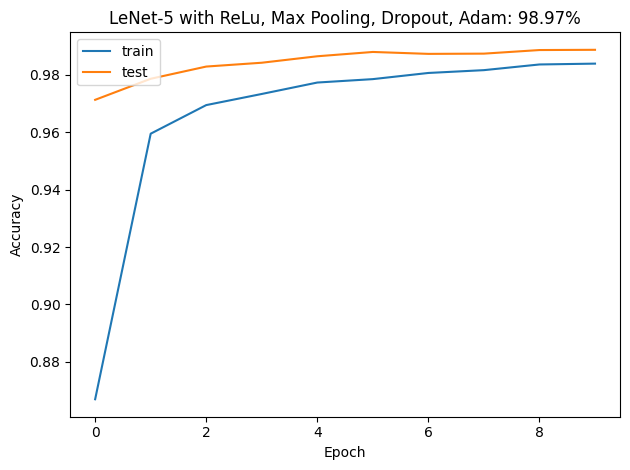

In [130]:
# batch size is 128

### LENET 5, RELU Activation, Adam solver, Max Pooling, Dropout

keras.utils.set_random_seed(42)

model = keras.Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=6,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation= 'relu'))
model.add(Dense(units=10, activation ='softmax'))

model.compile(
    optimizer = keras.optimizers.Adam(),
    # loss = keras.losses.categorical_crossentropy,
    loss = keras.losses.CategoricalCrossentropy,
    metrics = ['accuracy']
)

model.summary()

# hist_log_reg_model = log_reg_model.fit(x_train, y_train_categorical,
model_hist = model.fit(x_train, y_train_categorical,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2,
          callbacks=None) #[history])

model_score = model.evaluate(x_test, y_test_categorical, verbose=0)

plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title(f'LeNet-5 with ReLu, Max Pooling, Dropout, Adam: {model_score[1]*100:.2f}%')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig(f"lenet_5_relu_mp_drop_adam.jpg")

Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_46 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 120)                 │          94,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,786 (421.04 KB)

 Trainable params: 107,786 (421.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.8178 - loss: 0.5553 - val_accuracy: 0.9778 - val_loss: 0.0758
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9651 - loss: 0.1056 - val_accuracy: 0.9816 - val_loss: 0.0590
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9733 - loss: 0.0811 - val_accuracy: 0.9856 - val_loss: 0.0530
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9781 - loss: 0.0701 - val_accuracy: 0.9876 - val_loss: 0.0507
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9799 - loss: 0.0617 - val_accuracy: 0.9872 - val_loss: 0.0451
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9829 - loss: 0.0541 - val_accuracy: 0.9878 - val_loss: 0.0400
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9826 - loss: 0.0551 - val_accuracy: 0.9864 - val_loss: 0.0430
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9833 -

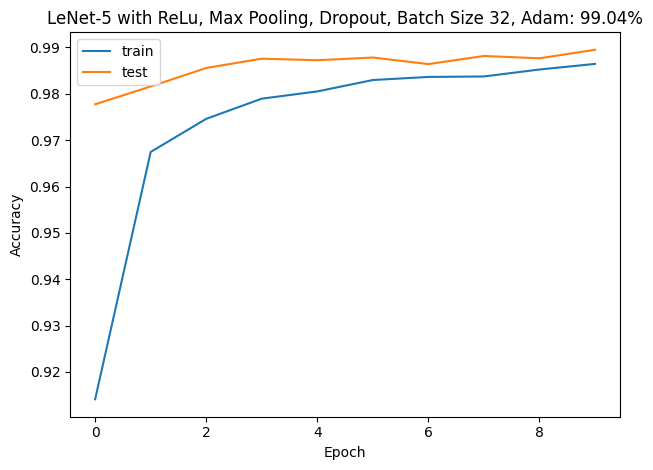

In [131]:
# batch size is 32

### LENET 5, RELU Activation, Adam solver, Max Pooling, Batch Norm

keras.utils.set_random_seed(42)

model = keras.Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=6,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation= 'relu'))
model.add(Dense(units=10, activation ='softmax'))

model.compile(
    optimizer = keras.optimizers.Adam(),
    # loss = keras.losses.categorical_crossentropy,
    loss = keras.losses.CategoricalCrossentropy,
    metrics = ['accuracy']
)

model.summary()

# hist_log_reg_model = log_reg_model.fit(x_train, y_train_categorical,
model_hist = model.fit(x_train, y_train_categorical,
          batch_size=32,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2,
          callbacks=None) #[history])

model_score = model.evaluate(x_test, y_test_categorical, verbose=0)

plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title(f'LeNet-5 with ReLu, Max Pooling, Dropout, Batch Size 32, Adam: {model_score[1]*100:.2f}%')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.savefig(f"lenet_5_relu_mp_drop_32_adam.jpg")